Predicting the progression of diabetes 1 year later

Learning LinReg

Link: https://youtu.be/aV_sRopNTrw?si=Uwoe1HDrQW2tXk8g

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Loading diabibetes dataset
diabetes = load_diabetes()

# print(diabetes)

# converting dthe data to a pandas DataFrame
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
# Adding tartget, our target range is 25 to 346
my_df['target']= diabetes.target

my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
# Grabing the head, the first 5 rows
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Part 2:
Link: https://youtu.be/zAxuIlCBvOw?si=kmbeG_i4KFBjBFq2

 - Now we are going to split the data into x and y variables
 - X being the features which are: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target.
 - Y being the targets

In [5]:
# Spliting the data into X and y
X = my_df.drop('target', axis=1) # removing the target coloumn
y = my_df['target']
X.shape, y.shape

((442, 10), (442,))

### -  ((442, 10), (442,)) means there are 442 rows of data and 10 coloumns

When training data:
80% goes into training,
20% goes into testing

In [7]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# printing out the shape of the training and testing sets
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ",  X_test.shape, y_test.shape)

Training set shape:  (353, 10) (353,)
Testing set shape:  (89, 10) (89,)


In [9]:
from sklearn.linear_model import LinearRegression

# Creating a linearRegression Model
lr = LinearRegression()
lr

LinearRegression()

In [10]:
# Training the model on the training set - this is how the model learns

lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting on the testing set
# Y_preds are predicted values of the targets based on the features
# Once we have those preds, we can compare them to the actual values of the target variable
# To evaluate the performance of the model.
y_pred = lr.predict(X_test)
y_pred.shape

(89,)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluating the performance of the model
# The equations are here  below:

r2 = r2_score(y_test, y_pred) # 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

print("R2 score: ", r2)
print("Mean_Squared_Error: ", r2)
print("Mean_Absolute_Error: ", r2)
print("Intercept: ", intercept)

R2 score:  0.4526027629719196
Mean_Squared_Error:  0.4526027629719196
Mean_Absolute_Error:  0.4526027629719196
Intercept:  151.34560453985995


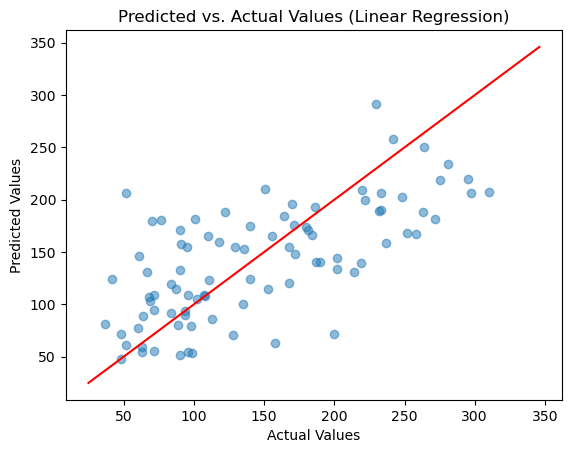

In [16]:
import matplotlib.pyplot as plt

# Plot the prediction vs actual values
# predicted values of the target variable are plotted on the x-axis
# Actual values of the target variable are plotted on the y-axis
# If the model is a good fit, the points should be close to the diagonal line, indicating a strong linear relatuonship between the actual and predicted values

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.show()



PLoting the residuals
 → The residuals are plotted against the predicted values of the target variable.
 → If the linear regression model is a good fit for the day,the risidual plot should show a random scatter of the points around zero, with no discrenable trend.

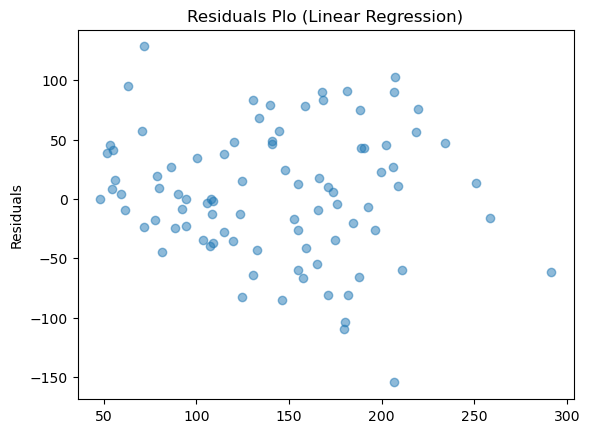

In [17]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.ylabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plo (Linear Regression)")
plt.show()